# Задание
Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
Cохранить результаты в pandas dataframe

Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных: -- Привести колонки датафрейма к одному типу данных -- Проверить индекс, чтобы он соответствовал порядку строк -- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки

Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. 

-- Рассчитать объемы вводимого жилья по регионам и по годам. 

-- Визуализировать разброс, связь и распределение этих показателей по регионам 

-- Сделать выводы по каждому из расчетов и графиков

In [1]:
#Импортирование библиотек
import requests
import pandas as pd
import sqlite3

#Библиотеки визуализации
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
%matplotlib inline

In [2]:
missing_values = ["nan",'N/A']
df = pd.read_csv('our_home_data.csv', na_values = missing_values)
pd.set_option('display.max_columns', None)

# Просмотр DataSet

In [3]:
df.shape

(10527, 110)

In [4]:
df.head(5)

,Unnamed: 0,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,data.developer.regRegionDesc,data.developer.devPhoneNum,data.developer.devSite,data.developer.devEmail,data.developer.devInn,data.developer.devOgrn,data.developer.devKpp,data.developer.devLegalAddr,data.developer.devFactAddr,data.developer.lastRpdId,data.developer.fundGuarantyFlg,data.developer.devOrgRegRegionCd,data.developer.devEmplMainFullNm,data.developer.orgForm.id,data.developer.orgForm.fullForm,data.developer.orgForm.shortForm,data.developer.objGuarantyEscrowFlg,data.developer.govFundFlg,data.region,data.address,data.objElemLivingCnt,data.objReady100PercDt,data.wallMaterialShortDesc,data.objLkFinishTypeDesc,data.objLkFreePlanDesc,data.objElemParkingCnt,data.objSquareLiving,data.rpdNum,data.rpdPdfLink,data.rpdIssueDttm,data.objLkLatitude,data.objLkLongitude,data.objCompensFundFlg,data.objProblemFlg,data.objLkClassDesc,data.loadDttm,data.photoRenderDTO,data.objGuarantyEscrowFlg,data.objectType,data.residentialBuildings,data.newBuildingId,data.objFlatCnt,data.objFlatSq,data.objNonlivElemCnt,data.objStatus,data.isAvailableWantLiveHere,data.objInfrstrBicycleLaneFlg,data.objInfrstrRampFlg,data.objInfrstrCurbLoweringFlg,data.objectTransportInfo,data.conclusion,data.objLkSaleDepEmail,data.objGreenHouseFlg,data.objEnergyEffShortDesc,data.infrastructureIndexValue,data.developer.developerGroupName,data.developer.companyGroupId,data.floorMin,data.floorMax,data.miniUrl,data.objFloorCnt,data.quartography.objLivElem1KCnt,data.quartography.objLivElem2KCnt,data.quartography.objLivElem3KCnt,data.quartography.objLivElem4KCnt,data.quartography.objLivElemCnt,data.quartography.objLivElemEntrCnt,data.quartography.objLivElemEntrFloorAvg,data.objTransferPlanDt,data.objLivCeilingHeight,data.objInfrstrPlaygrndCnt,data.objInfrstrSportGroundCnt,data.objInfrstrTrashAreaCnt,data.objInfrstrObjPrkngCnt,data.objInfrstrNotObjPrkngCnt,data.objElevatorWheelchairCnt,data.objElevatorPassengerCnt,data.objElevatorCargoCnt,data.soldOutPerc,data.objPriceAvg,data.generalContractorNm,data.nonlivFirstFloor,data.transportDistIndex,data.transportDistIndexValue,data.nameObj,data.greenAreaIndexValue,data.airQualityIndexValue,data.complexShortNm,data.developer.bankruptStage.bankruptStageCd,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors
0,0,0,29678,124648,7424,212-2,212-2,212-2,0,2,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093.0,0,61.0,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,61,"город Таганрог, улица Сергея Шило, д. 212-2",27,2020-03-31,Другое,Под чистовую,Нет,0,1519.00,61-000819,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:18,47.2197,38.9134,0,0,Комфорт,17-08-2022 01:24,[],0,normal,1,15941,27,1519.00,0,0,True,0,0,0,[],False,fonddolomsk@bk.ru,0,Не нормируется,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,29679,124647,7424,212-2,212-2,212-2,0,2,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093.0,0,61.0,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,61,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18

In [5]:
df.dtypes

Unnamed: 0                int64
errcode                   int64
data.id                   int64
data.pdId                 int64
data.developer.devId      int64
                         ...   
data.metro.line          object
data.metro.color         object
data.metro.time         float64
data.metro.isWalk        object
data.metro.colors        object
Length: 110, dtype: object

In [6]:
df.describe()

,Unnamed: 0,errcode,data.id,data.pdId,data.developer.devId,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,data.developer.devInn,data.developer.devOgrn,data.developer.devKpp,data.developer.lastRpdId,data.developer.fundGuarantyFlg,data.developer.devOrgRegRegionCd,data.developer.orgForm.id,data.developer.objGuarantyEscrowFlg,data.developer.govFundFlg,data.region,data.objElemLivingCnt,data.objElemParkingCnt,data.objSquareLiving,data.objLkLatitude,data.objLkLongitude,data.objCompensFundFlg,data.objProblemFlg,data.objGuarantyEscrowFlg,data.residentialBuildings,data.newBuildingId,data.objFlatCnt,data.objFlatSq,data.objNonlivElemCnt,data.objStatus,data.objInfrstrBicycleLaneFlg,data.objInfrstrRampFlg,data.objInfrstrCurbLoweringFlg,data.objGreenHouseFlg,data.infrastructureIndexValue,data.developer.companyGroupId,data.floorMin,data.floorMax,data.objFloorCnt,data.quartography.objLivElem1KCnt,data.quartography.objLivElem2KCnt,data.quartography.objLivElem3KCnt,data.quartography.objLivElem4KCnt,data.quartography.objLivElemCnt,data.quartography.objLivElemEntrCnt,data.quartography.objLivElemEntrFloorAvg,data.objInfrstrPlaygrndCnt,data.objInfrstrSportGroundCnt,data.objInfrstrTrashAreaCnt,data.objInfrstrObjPrkngCnt,data.objInfrstrNotObjPrkngCnt,data.objElevatorWheelchairCnt,data.objElevatorPassengerCnt,data.objElevatorCargoCnt,data.soldOutPerc,data.objPriceAvg,data.nonlivFirstFloor,data.transportDistIndexValue,data.greenAreaIndexValue,data.airQualityIndexValue,data.developer.bankruptStage.bankruptStageCd,data.metro.id,data.metro.time
count,10527.000000,10527.0,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,1.052700e+04,1.052700e+04,1.052700e+04,10526.00000,10527.000000,10407.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10516.000000,10516.000000,10527.000000,10527.0,10527.000000,10527.000000,1.052700e+04,10527.000000,10527.000000,10527.000000,10527.0,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,7750.000000,10523.000000,10525.000000,10525.000000,9363.000000,9363.000000,9363.000000,9363.000000,9363.000000,9363.000000,9363.000000,10450.000000,10448.000000,10450.000000,10445.000000,10438.000000,10450.000000,10450.000000,10450.000000,7.609000e+03,7.604000e+03,10516.000000,2143.000000,1603.000000,1252.000000,103.000000,83.000000,83.000000
mean,5263.000000,0.0,38049.551819,389144.793388,7350.374941,0.074380,12.484089,8.929325,5.103416e+09,1.223806e+12,4.972807e+08,618061.16977,0.151515,49.589315,5.033153,0.869763,0.007600,48.743897,190.112093,36.477914,9449.618125,53.638272,52.331917,0.111903,0.0,0.844495,0.890662,1.016204e+05,190.112093,9449.618125,40.972357,0.0,0.161395,0.617650,0.904056,0.187708,5.770590,6452.500645,10.493585,12.518765,12.518765,113.311011,69.410873,27.595642,3.300972,213.618498,3.054470,7.143864,1.519330,1.301780,1.329569,48.853997,34.622150,0.402775,2.407656,0.997225,4.760432e-01,1.119462e+05,0.400913,5.194120,5.207735,7.040735,4.427184,35.705855,17.860643
std,3039.027476,0.0,9866.704287,191919.233183,4856.884717,0.922246,25.550732,25.494545,2.434959e+09,5.714933e+11,2.335760e+08,35089.57599,0.358567,23.404561,10.647262,0.336579,0.086847,23.175334,235.800885,116.035248,11407.080243,5.056758,26.117196,0.315262,0.0,0.362403,0.312078,4.898821e+04,235.800885,11407.080243,119.294633,0.0,0.367912,0.485985,0.294528,0.390497,2.696874,1079.244126,7.755006,8.426170,8.426170,152.925890,84.102110,44.313148,14.836839,239.799907,3.247503,4.634185,1.732095,1.632548,1.325377,85.652793,98.087156,1.382101,3.575009,2.356716,3.482273e-01,1.109353e+05,0.490107,2.895088,2.855862,1.363836,0.858658,42.712610,7.281856
min,0.000000,0.0,851.000000,172.000000,10.000000,0.000000,1.000000,0.000000,1.050087e+08,1.020101e+12,1.050100e+07,96889.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,42.053200,19.903300,0.000000,0.0,0.000000,0.000000,2.900000e+01,0.000000,0.000000,0.000000,0.0,0.00

# Чистка

Удаление стобцов, где находится более 50% пустых ячеек

In [7]:
df = df.drop(columns = 'data.developer.bankruptStage.bankruptStageCd')
df = df.drop(columns = 'data.developer.bankruptStage.bankruptStageDesc')
df = df.drop(columns = 'data.developer.bankruptStage.bankruptLawUrl')
df = df.drop(columns = 'data.developer.orgBankruptMsgDttm')
df = df.drop(columns = 'data.metro.id')
df = df.drop(columns = 'data.metro.name')
df = df.drop(columns = 'data.metro.line')
df = df.drop(columns = 'data.metro.color')
df = df.drop(columns = 'data.metro.time')
df = df.drop(columns = 'data.metro.isWalk')
df = df.drop(columns = 'data.metro.colors')
df = df.drop(columns = 'data.transportDistIndexValue')
df = df.drop(columns = 'data.photoRenderDTO')
df = df.drop(columns = 'data.objectTransportInfo')

Очистка строк с NaN из-за невозможности восстановления данных для подзадачи 1

In [8]:
df_avg_P = df.dropna(subset=['data.objPriceAvg','data.developer.regRegionDesc','data.objReady100PercDt'])

Также можно использовать очистку всех строк, где имеются NaN

df.dropna(axis=0,inplace=True, how='all')

# Анализ Данных

### Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.

In [9]:
avg_price_region_nv = df.groupby('data.developer.regRegionDesc').mean()
avg_price_region_nv = avg_price_region_nv.sort_values(by='data.objPriceAvg')
avg_price_region = avg_price_region_nv['data.objPriceAvg']
avg_price_region.head(5)

data.developer.regRegionDesc
Мурманская область                     20442.000000
Дагестан Республика                    30793.933333
Чеченская Республика                   32742.333333
Северная Осетия - Алания Республика    43500.117647
Кабардино-Балкарская Республика        48194.600000
Name: data.objPriceAvg, dtype: float64

### Рассчитать объемы вводимого жилья по регионам и по годам

In [10]:
data_prepare = df

In [11]:
c = 0
date_data = []
for i in data_prepare['data.objReady100PercDt']:
    if i not in date_data:
        date_data.append(i)

for i in date_data:
    data_prepare = data_prepare.replace(i,i[:4:])

In [12]:
count_data = data_prepare.groupby(['data.developer.regRegionDesc','data.objReady100PercDt']).count()
count_data = count_data.sort_values(by='data.objReady100PercDt')
count_data.head(5)

,,Unnamed: 0,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,data.developer.devPhoneNum,data.developer.devSite,data.developer.devEmail,data.developer.devInn,data.developer.devOgrn,data.developer.devKpp,data.developer.devLegalAddr,data.developer.devFactAddr,data.developer.lastRpdId,data.developer.fundGuarantyFlg,data.developer.devOrgRegRegionCd,data.developer.devEmplMainFullNm,data.developer.orgForm.id,data.developer.orgForm.fullForm,data.developer.orgForm.shortForm,data.developer.objGuarantyEscrowFlg,data.developer.govFundFlg,data.region,data.address,data.objElemLivingCnt,data.wallMaterialShortDesc,data.objLkFinishTypeDesc,data.objLkFreePlanDesc,data.objElemParkingCnt,data.objSquareLiving,data.rpdNum,data.rpdPdfLink,data.rpdIssueDttm,data.objLkLatitude,data.objLkLongitude,data.objCompensFundFlg,data.objProblemFlg,data.objLkClassDesc,data.loadDttm,data.objGuarantyEscrowFlg,data.objectType,data.residentialBuildings,data.newBuildingId,data.objFlatCnt,data.objFlatSq,data.objNonlivElemCnt,data.objStatus,data.isAvailableWantLiveHere,data.objInfrstrBicycleLaneFlg,data.objInfrstrRampFlg,data.objInfrstrCurbLoweringFlg,data.conclusion,data.objLkSaleDepEmail,data.objGreenHouseFlg,data.objEnergyEffShortDesc,data.infrastructureIndexValue,data.developer.developerGroupName,data.developer.companyGroupId,data.floorMin,data.floorMax,data.miniUrl,data.objFloorCnt,data.quartography.objLivElem1KCnt,data.quartography.objLivElem2KCnt,data.quartography.objLivElem3KCnt,data.quartography.objLivElem4KCnt,data.quartography.objLivElemCnt,data.quartography.objLivElemEntrCnt,data.quartography.objLivElemEntrFloorAvg,data.objTransferPlanDt,data.objLivCeilingHeight,data.objInfrstrPlaygrndCnt,data.objInfrstrSportGroundCnt,data.objInfrstrTrashAreaCnt,data.objInfrstrObjPrkngCnt,data.objInfrstrNotObjPrkngCnt,data.objElevatorWheelchairCnt,data.objElevatorPassengerCnt,data.objElevatorCargoCnt,data.soldOutPerc,data.objPriceAvg,data.generalContractorNm,data.nonlivFirstFloor,data.transportDistIndex,data.nameObj,data.greenAreaIndexValue,data.airQualityIndexValue,data.complexShortNm
data.developer.regRegionDesc,data.objReady100PercDt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Краснодарский край,2017,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0
Московская область,2017,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3,3,0,0,0,0,0
Тюменская область,2018,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0
Пермский край,2018,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0
Новосибирская область,2019,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [13]:
count_build_data = count_data['data.id']
count_build_data 

data.developer.regRegionDesc  data.objReady100PercDt
Краснодарский край            2017                      1
Московская область            2017                      3
Тюменская область             2018                      1
Пермский край                 2018                      1
Новосибирская область         2019                      1
                                                       ..
Свердловская область          2034                      1
Рязанская область             2036                      1
Свердловская область          2036                      1
                              2038                      1
                              2039                      1
Name: data.id, Length: 423, dtype: int64

# Визуализация

### Визуализация средней цены за квадратный метр в каждом регионе

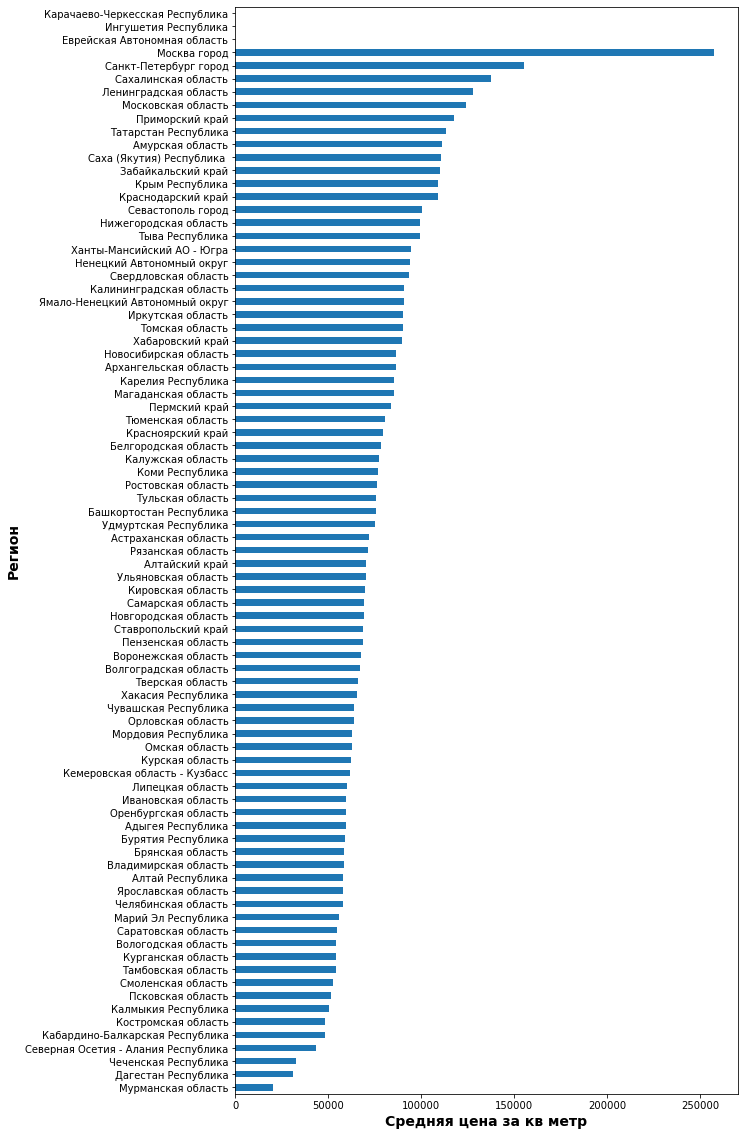

In [14]:
rcParams['figure.figsize'] = 9,20
avg_price_region.plot(kind='barh')
plt.xlabel("Средняя цена за кв метр",fontsize=14, fontweight="bold")
plt.ylabel("Регион",fontsize=14, fontweight="bold")
avg_price_region.sort_values(ascending=False)
plt.show()

### Визуализация количества строящихся домов в каждом регионе за каждый год 

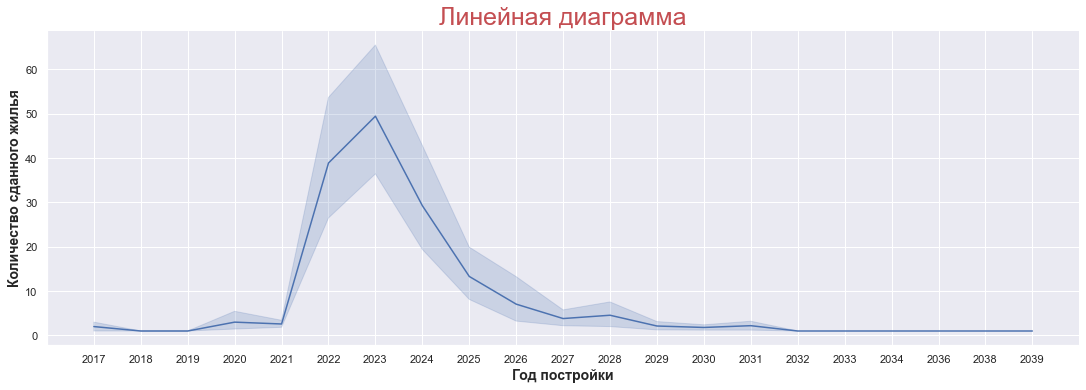

In [15]:

sns.set(style='darkgrid')  

sns.relplot(
    x='data.objReady100PercDt', 
    y='data.id',  
    data=count_data, 
    kind='line',
    aspect=3
    
)
plt.xlabel("Год постройки",fontsize=14, fontweight="bold")
plt.ylabel("Количество сданного жилья",fontsize=14, fontweight="bold")
plt.title('Линейная диаграмма', size=25, color='r');

# Выводы
Исходя из проведенного анализа мы можем точно сказать, что самые дорогие средние кв^2 находтся в регионе города Москвы. Также можно заметить, что в 2023-226 будет отдано жильцам большое количество домов, но также уже есть небольшие планы застройки на 2028 год.
